<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/Networks/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0" width=150px> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Interactive Visualization</h1>
<h1>Jupyter ipywidgets</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt 

import ipywidgets as widgets

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.11.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.0-69-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Git hash: 24f494a22f6ac6b6378b6db1efb3361ea69fb84c

matplotlib: 3.7.1
numpy     : 1.24.2
ipywidgets: 8.0.6
watermark : 2.3.1
pandas    : 1.5.3



# Basic widgets with the Interact decorator

Let us load up some data

In [3]:
data = pd.read_csv('data/gapminder.csv')

And define some useful arrays.

In [4]:
colors = np.array([
    '#5A6FFA',
    '#E60DA1',
    "#7E7E7E",
    "#B7F025",
    "#FF9A1E"])

continents = [
    'Africa',
    'Americas',
    'Asia',
    'Europe',
    'Oceania']

And define a simple function to generate the simple plot we created in Lesson I

In [5]:
def plot_continents():
    fig, ax = plt.subplots(1, figsize=(14,10))

    for i in range(5):
        continent = data[data['Continent']==i]

        ax.scatter(continent['GDP'], # x-axis
                   continent['LifeExpectancy'], # y-axis
                   s=continent['Population']/200000, # Bubble size
                   c=colors[i], # Bubble color
                   alpha=0.5) # Transparency

    ax.set_xscale('log')

    # Add the legend manually
    for i in range(len(continents)):
        ax.text(300, 83-i*2, continents[i], color=colors[i], fontsize=18)

    ax.set_xlabel('GDP Per Capita')
    ax.set_ylabel('Life LifeExpectancy')
    ax.set_xlim(200, 100000)
    ax.set_ylim(40, 90)

    fig.tight_layout()

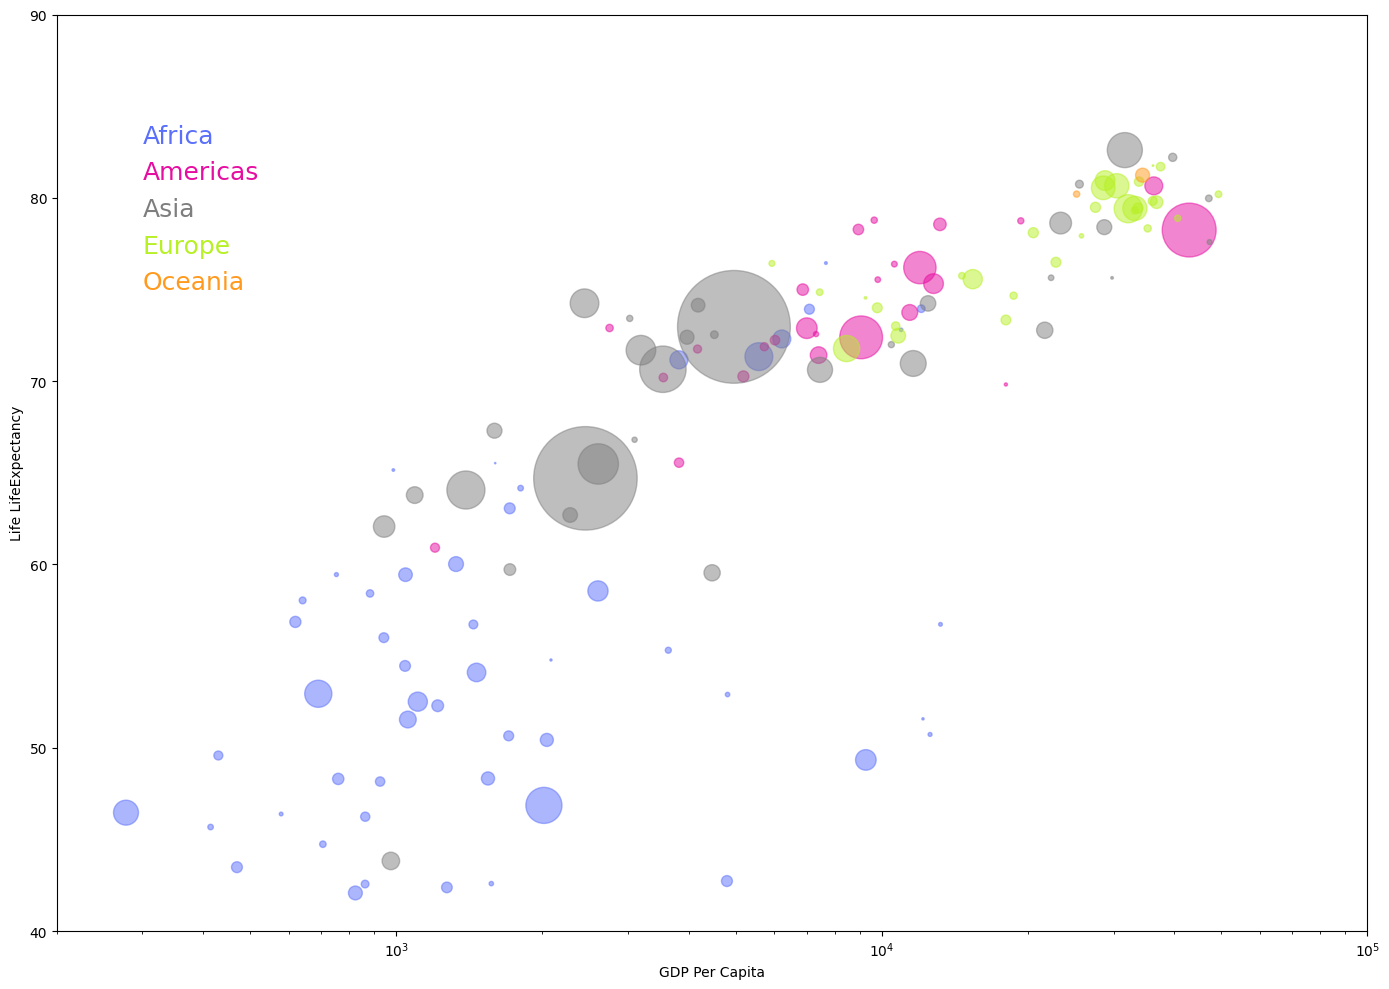

In [6]:
plot_continents()

Create a dictionary to map continent names to integer IDs

In [16]:
cont_dict = dict(zip(continents, range(len(continents))))
cont_dict

{'Africa': 0, 'Americas': 1, 'Asia': 2, 'Europe': 3, 'Oceania': 4}

Now we can use @widgets.interact to automatically generate widgets matching the function arguments. Here we pass the dictionary created above as the default argument. This will force interact to display the dictionary keys in the dropdown box, while passing the numerical value as input to the function

In [8]:
@widgets.interact
def plot_continent(cont = cont_dict):
    fig, ax = plt.subplots(1, figsize=(14,10))

    continent = data[data['Continent']==cont]
    
    ax.scatter(continent['GDP'], # x-axis
               continent['LifeExpectancy'], # y-axis
               s=continent['Population']/200000, # Bubble size
               c=colors[cont], # Bubble color
               alpha=0.5) # Transparency

    ax.set_xscale('log')

    # Add the legend manually
    ax.text(300, 83-cont*2, continents[cont], color=colors[cont], fontsize=18)

    ax.set_xlabel('GDP Per Capita')
    ax.set_ylabel('Life LifeExpectancy')
    ax.set_xlim(200, 100000)
    ax.set_ylim(40, 90)

    fig.tight_layout()

interactive(children=(Dropdown(description='cont', options={'Africa': 0, 'Americas': 1, 'Asia': 2, 'Europe': 3…

Boolean arguments correspond to check boxes

In [9]:
@widgets.interact
def plot_continent(cont = cont_dict, log_scale=True):
    fig, ax = plt.subplots(1, figsize=(14,10))

    continent = data[data['Continent']==cont]
    
    ax.scatter(continent['GDP'], # x-axis
               continent['LifeExpectancy'], # y-axis
               s=continent['Population']/200000, # Bubble size
               c=colors[cont], # Bubble color
               alpha=0.5) # Transparency
    
    if log_scale:
        ax.set_xscale('log')

    # Add the legend manually
    ax.text(300, 83-cont*2, continents[cont], color=colors[cont], fontsize=18)

    ax.set_xlabel('GDP Per Capita')
    ax.set_ylabel('Life LifeExpectancy')
    ax.set_xlim(200, 100000)
    ax.set_ylim(40, 90)

    fig.tight_layout()

interactive(children=(Dropdown(description='cont', options={'Africa': 0, 'Americas': 1, 'Asia': 2, 'Europe': 3…

Let's add another parameter to our function to change the font size

In [10]:
font_sizes = [10, 14, 18, 22, 26]

interact helpfully adds a third parameter with the appropriate widget

In [22]:
@widgets.interact
def plot_continent(selected_cont = cont_dict, log_scale=True, font_size=font_sizes):
    fig, ax = plt.subplots(1, figsize=(10,5))

    continent = data[data['Continent']==selected_cont]
    
    ax.scatter(continent['GDP'], # x-axis
               continent['LifeExpectancy'], # y-axis
               s=continent['Population']/200000, # Bubble size
               c=colors[selected_cont], # Bubble color
               alpha=0.5) # Transparency
    
    if log_scale:
        ax.set_xscale('log')

    # Add the legend manually
    ax.text(300, 83-selected_cont*2, 
            continents[selected_cont], 
            color=colors[selected_cont], 
            fontsize=font_size)

    ax.set_xlabel('GDP Per Capita')
    ax.set_ylabel('Life LifeExpectancy')
    ax.set_xlim(200, 100000)
    ax.set_ylim(40, 90)

    fig.tight_layout()

interactive(children=(Dropdown(description='selected_cont', options={'Africa': 0, 'Americas': 1, 'Asia': 2, 'E…

In [12]:
widgets.interact(plot_continent, 
                cont = cont_dict, 
                log_scale=True, 
                font_size=font_sizes);

interactive(children=(Dropdown(description='cont', options={'Africa': 0, 'Americas': 1, 'Asia': 2, 'Europe': 3…

In [13]:
widgets.interact_manual(plot_continent, 
                cont = cont_dict, 
                log_scale=True, 
                font_size=font_sizes);

interactive(children=(Dropdown(description='cont', options={'Africa': 0, 'Americas': 1, 'Asia': 2, 'Europe': 3…

But we can also specify by hand which widget we want to use, including any options we like

In [14]:
font_slider = widgets.IntSlider(
    value=18,
    min=10,
    max=40,
    step=2,
    description='Font size:',
    disabled=False,
    
    # Should the figure be updated as the value is being changed?
    continuous_update=False,
    orientation='horizontal',
    #readout=True,
    
    # Show only decimal values
    readout_format='d'
)

widgets.interact(plot_continent, 
                 cont = cont_dict, 
                 log_scale=True, 
                 font_size=font_slider);

interactive(children=(Dropdown(description='cont', options={'Africa': 0, 'Americas': 1, 'Asia': 2, 'Europe': 3…

Connected widgets

In [15]:
continent_widget = widgets.Dropdown(
    options=cont_dict,
    value=3,
    description='Continent:',
)

new_font_slider = widgets.IntSlider(
    value=18,
    min=10,
    max=40,
    step=2,
    description='Font size:',
    disabled=False,
    
    # Should the figure be updated as the value is being changed?
    continuous_update=False,
    orientation='horizontal',
    
    # Show only decimal values
    readout_format='d'
)

def update_font_range(*args):
    print(args)
    new_font_slider.max = 30 + 2.0 * continent_widget.value

# Tell the continent widget to call update_font_range 
# whenever it's value changes
continent_widget.observe(update_font_range, 'value')

# Use interact as a function instead of a decorator
widgets.interact(plot_continent, 
                 cont = continent_widget, 
                 log_scale=True, 
                 font_size=new_font_slider);

interactive(children=(Dropdown(description='Continent:', index=3, options={'Africa': 0, 'Americas': 1, 'Asia':…

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>